# Chapter 8. Gradient Descent

## The Idea Behind Gradient Descent

In [1]:
# Extracted from Chapter 4. Linear Algebra, in order to run the code below.
# Please refer to the notebook for the full chapter content.

from typing import List

Vector = List[float]

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot([1, 2, 3], [4, 5, 6]) == 32  # 1 * 4 + 2 * 5 + 3 * 6

In [2]:
def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

<h3>Finding a minimun using gradient descent</h3>

![Finding a minimun using gradient descent](./assets/Figure%208-1.png)

<div class="alert alert-block alert-info">
<b>Note:</b> If a function has a <b>unique global minimum</b>, this procedure is likely to find it.

If a function has <b>multiple (local) minima</b>, this procedure might “find” the wrong one of them, in which case you might rerun the procedure from different starting points.

If a function has <b>no minimum</b>, then it’s possible the procedure might go on forever.
</div>

## Estimating the Gradient

In [3]:
from typing import Callable

def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

<h3>Approximating a derivative with a difference quotient</h3>

![Approximating a derivative with a difference quotient](./assets/Figure%208-2.png)

In [4]:
def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

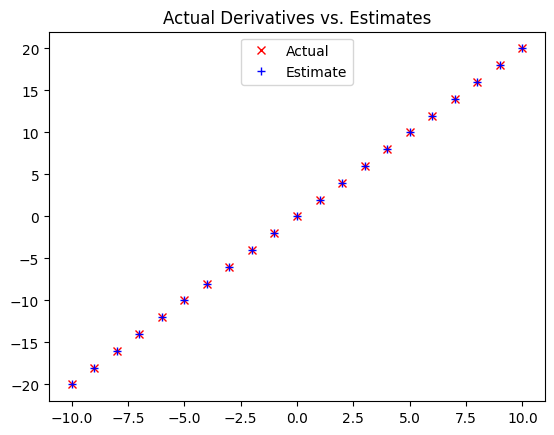

In [5]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

# Plot to show they're basically the same
import matplotlib.pyplot as plt

plt.title("Actual Derivatives vs. Estimates")

plt.plot(xs, actuals, 'rx', label='Actual')        # red  x
plt.plot(xs, estimates, 'b+', label='Estimate')    # blue +

plt.legend(loc=9)
plt.show()

In [7]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """Returns the i-th partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0)    # add h to just the ith element of v
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h

def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

## Using the Gradient

In [8]:
# Extracted from Chapter 4. Linear Algebra, in order to run the code below.
# Please refer to the notebook for the full chapter content.

import math

def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i + w_i for v_i, w_i in zip(v, w)]

assert add([1, 2, 3], [4, 5, 6]) == [5, 7, 9]

def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i - w_i for v_i, w_i in zip(v, w)]

assert subtract([5, 7, 9], [4, 5, 6]) == [1, 2, 3]

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

assert scalar_multiply(2, [1, 2, 3]) == [2, 4, 6]

def magnitude(v: Vector) -> float:
    """Returns the magnitude (or length) of v"""
    return math.sqrt(sum_of_squares(v))  # math.sqrt is square root function

assert magnitude([3, 4]) == 5

def distance(v: Vector, w: Vector) -> float:
    return magnitude(subtract(v, w))

In [9]:
import random

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves 'step_size' in the 'gradient' direction from 'v'"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# Pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)    # Compute the gradient at v
    v = gradient_step(v, grad, -0.01)    # Take a negative gradient step

    print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001  # v should be close to 0

0 [-6.024439814113216, 7.404652482974714, -8.66454792050226]
1 [-5.903951017830952, 7.2565594333152195, -8.491256962092216]
2 [-5.785871997474333, 7.111428244648915, -8.321431822850371]
3 [-5.670154557524846, 6.9691996797559375, -8.155003186393364]
4 [-5.556751466374349, 6.829815686160819, -7.991903122665496]
5 [-5.445616437046862, 6.693219372437603, -7.832065060212186]
6 [-5.336704108305925, 6.55935498498885, -7.675423759007943]
7 [-5.2299700261398065, 6.428167885289073, -7.521915283827784]
8 [-5.125370625617011, 6.299604527583292, -7.371476978151229]
9 [-5.022863213104671, 6.173612437031626, -7.2240474385882045]
10 [-4.922405948842577, 6.050140188290994, -7.0795664898164405]
11 [-4.8239578298657255, 5.929137384525174, -6.937975160020112]
12 [-4.727478673268411, 5.810554636834671, -6.799215656819709]
13 [-4.632929099803043, 5.694343544097977, -6.663231343683315]
14 [-4.540270517806982, 5.580456673216018, -6.529966716809649]
15 [-4.449465107450842, 5.468847539751698, -6.399367382473456

## Using Gradien Descent to Fit Models

In [10]:
# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

In [13]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept   # The prediction of the model
    error = (predicted - y)             # error is (predicted - actual).
    squared_error = error ** 2          # We'll minimize squared error
    grad = [2 * error * x, 2 * error]   # using its gradient
    return grad

In [14]:
# Extracted from Chapter 4. Linear Algebra, in order to run the code below.
# Please refer to the notebook for the full chapter content.

def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"

    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

assert vector_sum([[1, 2], [3, 4], [5, 6], [7, 8]]) == [16, 20]

def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

assert vector_mean([[1, 2], [3, 4], [5, 6]]) == [3, 4]

In [15]:
# Start with random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
    # Compute the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [33.0787834409439, 0.5067506369951855]
1 [11.271958195527414, 0.5288159191621391]
2 [25.81713269950238, 0.5290302455193422]
3 [16.11550151967743, 0.5437893177278058]
4 [22.58650427569288, 0.5488172406120276]
5 [18.27035046535346, 0.5603061104064965]
6 [21.14923654571965, 0.5674558486510369]
7 [19.229026679853646, 0.5774701734994545]
8 [20.509816674711118, 0.5855442598323092]
9 [19.655537822227515, 0.5948829879873556]
10 [20.225351155562233, 0.6033487598336084]
11 [19.845294127999825, 0.6123674134695034]
12 [20.098801184037587, 0.6209879727705642]
13 [19.9297205982197, 0.6298447980090607]
14 [20.04250620578547, 0.6385148290112622]
15 [19.967286875570103, 0.6472803055590252]
16 [20.0174669343003, 0.6559530318234772]
17 [19.98400550785352, 0.6646585926941305]
18 [20.006332984854396, 0.6733132810165958]
19 [19.991449212383134, 0.681972987439417]
20 [20.00138534832789, 0.6906004906769214]
21 [19.994766573155974, 0.6992206750438954]
22 [19.999189916380008, 0.7078170002669636]
23 [19.996248

## Minibatch and Stochastic Gradient Descent

In [16]:
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # This allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates 'batch_size'-sized minibatches from the dataset"""
    # Start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # Shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [17]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [18.47701202510971, 2.3665386488003763]
1 [19.764530226787187, 2.4876256489100563]
2 [20.386391208422094, 2.49336487040769]
3 [20.20681495937599, 2.503503921121003]
4 [20.112665298403478, 2.4883484254523123]
5 [20.077738303115726, 2.5020275901394533]
6 [19.88918585243679, 2.5076620273209826]
7 [20.96223474235138, 2.569879947259769]
8 [19.98778653999118, 2.828280374517871]
9 [20.038683574124345, 2.842221647562126]
10 [20.078049643047184, 2.9169123052351313]
11 [19.881598935172143, 2.9236427432673513]
12 [19.921733590204607, 2.9323745163327053]
13 [19.99504800813684, 3.01958797436763]
14 [20.022663043074616, 3.031748051358655]
15 [20.116184428640832, 3.0469779541642374]
16 [20.00801984255387, 3.1388382307262352]
17 [20.053008040210102, 3.1528596758005367]
18 [20.035162503068996, 3.155144490605069]
19 [19.584377920309365, 3.178177811704633]
20 [19.94598003729144, 3.1584164380632003]
21 [19.922192572956092, 3.226792504027487]
22 [20.04333575575193, 3.247064674884387]
23 [20.0467928700183

In [18]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [20.090326908954122, 0.5042464371627102]
1 [20.086450849915096, 0.6971311954952031]
2 [20.082741789035776, 0.8817404583609443]
3 [20.079191837910543, 1.0584292889775355]
4 [20.07579421938688, 1.2275375037715195]
5 [20.072542365850992, 1.3893903401015957]
6 [20.069430033078596, 1.5442990809297743]
7 [20.066451218749027, 1.6925616539285904]
8 [20.0636001994407, 1.8344632043131235]
9 [20.060871523450096, 1.9702766442416149]
10 [20.058259895518436, 2.1002631765684074]
11 [20.055760339113633, 2.2246727975946934]
12 [20.05336801428034, 2.3437447780408025]
13 [20.05107833439503, 2.4577081227013484]
14 [20.04888688543669, 2.566782011279201]
15 [20.046789436977853, 2.671176219299016]
16 [20.04478199825178, 2.771091522708643]
17 [20.04286066952793, 2.8667200834528095]
18 [20.04102181097955, 2.9582458193901484]
19 [20.03926181776574, 3.0458447572512006]
20 [20.037577325704966, 3.129685370723489]
21 [20.0359650941229, 3.2099289056832374]
22 [20.034422083754368, 3.2867296911915735]
23 [20.0329452